In [88]:
import pandas as pd
import numpy as np
from google.colab import drive
import nltk
from nltk import word_tokenize
from nltk import WordNetLemmatizer
from matplotlib import pyplot as plt
import seaborn as sns

In [89]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
# mount your Google Drive
drive.mount("/content/gdrive") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [91]:
path=F'/content/gdrive/My Drive/Data606/Data/Foreign_Exchange_Rates.csv'
df=pd.read_csv(path)

#path=F'/content/gdrive/My Drive/Data606/Data/abcnews-date-text.csv'
#df1=pd.read_csv(path)

In [92]:
df=df.drop('Unnamed: 0', axis=1)
df=df.replace(to_replace='ND', value=np.NaN)
df=df.set_index('Time Serie')
df = df.apply(pd.to_numeric)
df.head(1000)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.9640,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.9340,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.9350,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.9400,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-10-27,1.4209,0.8502,1.6402,0.5899,2.8710,1.3107,8.2767,7.7541,45.40,1183.0,11.1195,6.880,1.7430,6.3230,108.38,3.8,7.0230,7.7250,94.45,1.3159,33.95,39.99
2003-10-28,1.4182,0.8555,1.6340,0.5898,2.8625,1.3108,8.2766,7.7578,45.31,1186.0,11.0670,6.950,1.7455,6.3594,108.33,3.8,7.0364,7.7478,94.62,1.3287,33.95,39.98
2003-10-29,1.4190,0.8567,1.6329,0.5887,2.8540,1.3098,8.2766,7.7595,45.36,1179.0,11.1500,6.920,1.7362,6.3670,108.18,3.8,7.0534,7.7181,94.62,1.3293,33.95,39.95


In [93]:
df.tail(5)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,,
2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,71.28,1161.18,18.944,14.132,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,18.819,14.025,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94
2019-12-31,1.4225,0.8907,1.4826,0.7536,4.0190,1.2962,6.9618,7.7894,71.36,1155.46,18.860,13.973,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.30,0.9677,29.91,29.75


# **Foreign Exchange Analysis**

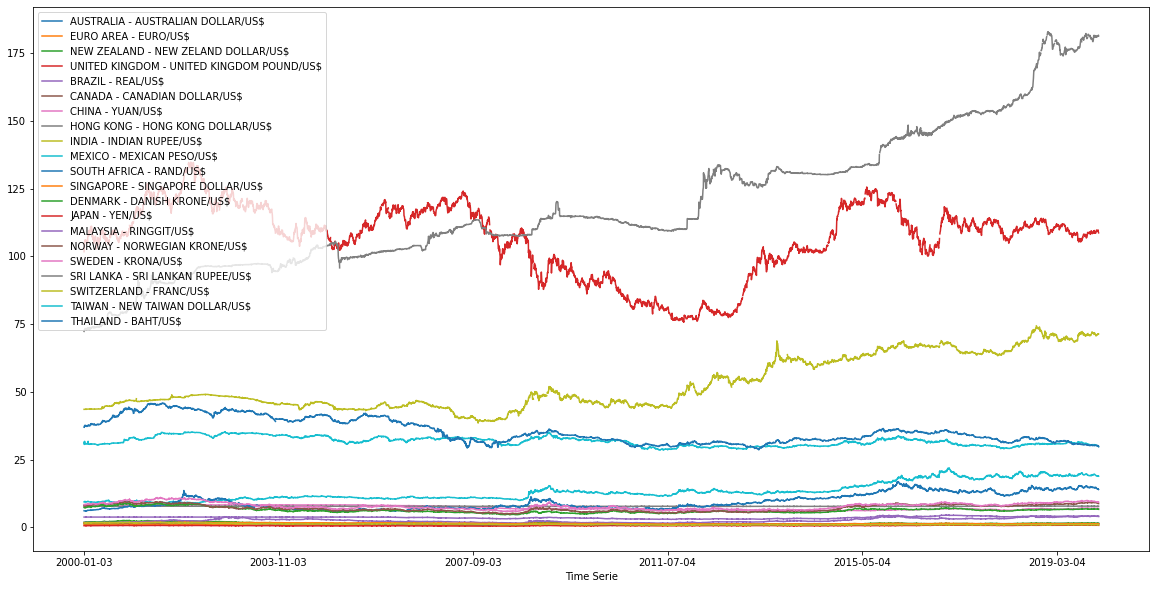

In [94]:
#df.plot(x='Time Serie')
df.drop('KOREA - WON/US$',axis=1).plot(legend=True,figsize=(20,10))

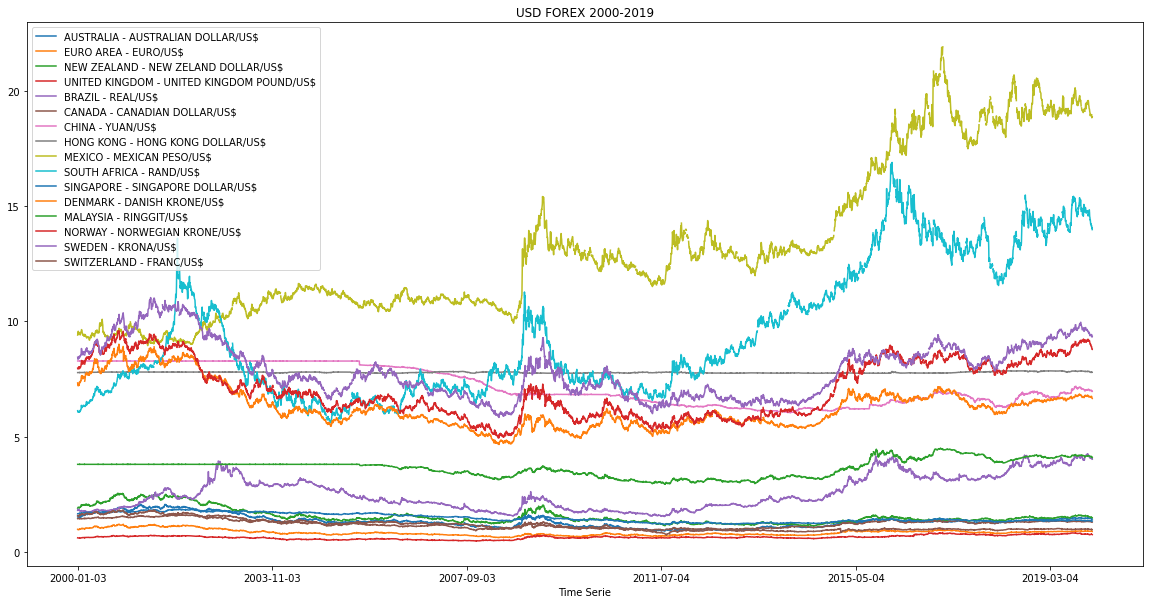

In [95]:
#df.plot(x='Time Serie')
df.drop(['KOREA - WON/US$','INDIA - INDIAN RUPEE/US$','THAILAND - BAHT/US$','SRI LANKA - SRI LANKAN RUPEE/US$','JAPAN - YEN/US$','TAIWAN - NEW TAIWAN DOLLAR/US$'],axis=1).plot(title='USD FOREX 2000-2019',legend=True,figsize=(20,10))

Yearly Change

In [96]:
df2=pd.DataFrame(columns=df.columns)
y=len(df.index.values)-1
x=0
yr=2000
ind=[]
while x<=y:
  yr=str(yr)
  #print(yr)
  if df.index[x]==yr+'-12-31' or df.index[x]==yr+'-12-30' or df.index[x]==yr+'-12-29' or df.index[x]==yr+'-12-28':
    df2=df2.append(df.iloc[x,:])
    ind.append(df.index[x])
    yr=int(yr)
    yr+=1
    #print(yr)
  x+=1


In [97]:
df2['date'] = pd.to_datetime(df2.index)
df2['year'] = df2.date.dt.year
df2.index=df2['year']
df2=df2.drop(['date','year'],axis=1)

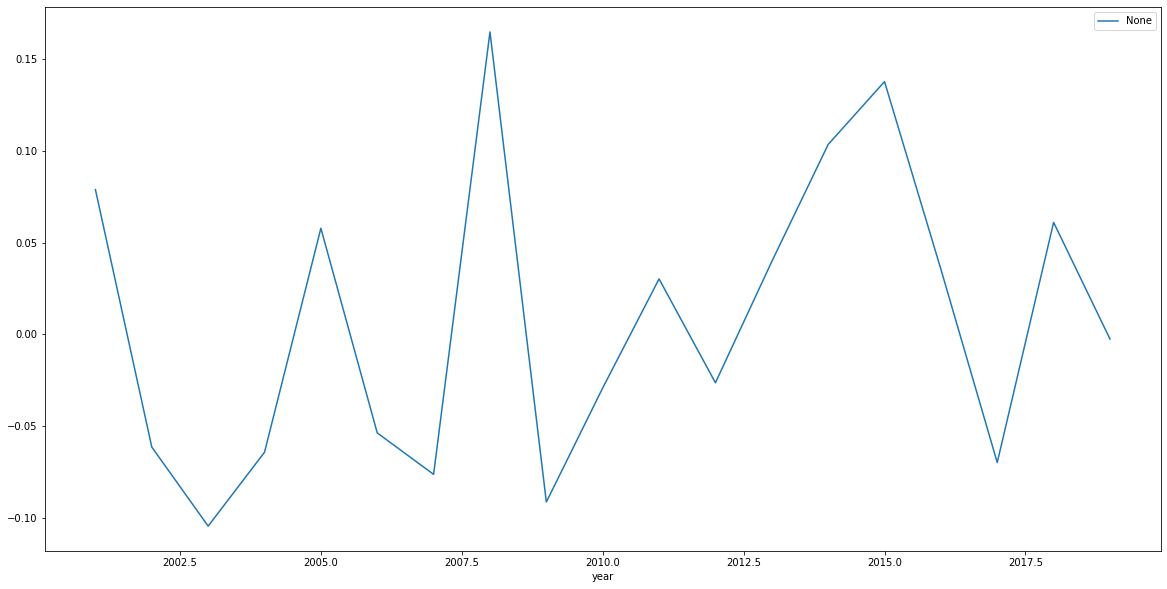

In [98]:
df2.drop(['KOREA - WON/US$','INDIA - INDIAN RUPEE/US$','THAILAND - BAHT/US$','SRI LANKA - SRI LANKAN RUPEE/US$','JAPAN - YEN/US$','TAIWAN - NEW TAIWAN DOLLAR/US$'],axis=1).pct_change(1).mean(axis=1).plot(legend=True,figsize=(20,10))

Monthly Change

In [99]:
#Monthly
df3=pd.DataFrame(columns=df.columns)
y=len(df.index.values)-1
x=0
yr=2000
month=1
ind=[]
while x<=y:
  yr=str(yr)
  month_str=str(month)
  #print(df.index[x])
  if month<=9 and df.index[x]==yr+'-0'+month_str+'-31' or df.index[x]==yr+'-0'+month_str+'-30' or df.index[x]==yr+'-0'+month_str+'-29' or df.index[x]==yr+'-0'+month_str+'-28' or df.index[x]==yr+'-0'+month_str+'-27' or df.index[x]==yr+'-0'+month_str+'-26':
    df3=df3.append(df.iloc[x,:])
    ind.append(df.index[x])
    month+=1
    #print(yr)
  if month>9 and df.index[x]==yr+'-'+month_str+'-31' or df.index[x]==yr+'-'+month_str+'-30' or df.index[x]==yr+'-'+month_str+'-29' or df.index[x]==yr+'-'+month_str+'-28' or df.index[x]==yr+'-'+month_str+'-27' or df.index[x]==yr+'-'+month_str+'-26':
    df3=df3.append(df.iloc[x,:])
    ind.append(df.index[x])
    month+=1
    if month==13:
      yr=int(yr)
      yr+=1
      month=1
      #print(yr)
  x+=1

In [100]:
df3['date'] = pd.to_datetime(df3.index)
df3['year'] = df3.date.dt.year
df3['month'] = df3.date.dt.month
df3.set_index(['year','month'], inplace=True)
df3=df3.drop(['date'],axis=1)

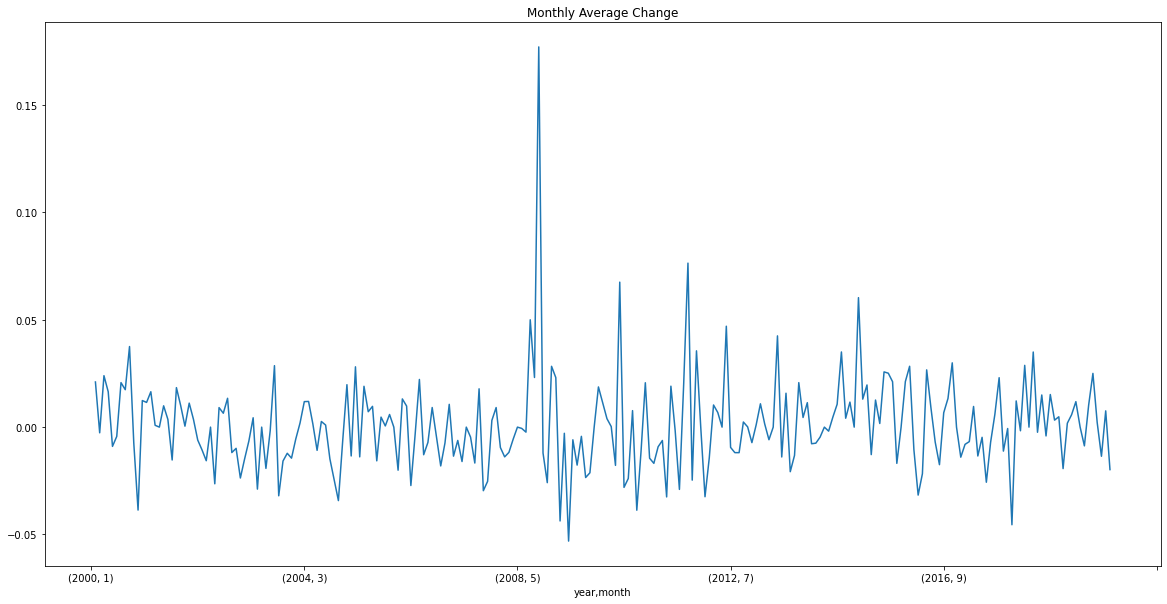

In [101]:
df3.drop(['KOREA - WON/US$','INDIA - INDIAN RUPEE/US$','THAILAND - BAHT/US$','SRI LANKA - SRI LANKAN RUPEE/US$','JAPAN - YEN/US$','TAIWAN - NEW TAIWAN DOLLAR/US$'],axis=1).pct_change(1).mean(axis=1).plot(title='Monthly Average Change',legend=False,figsize=(20,10))

Correlations

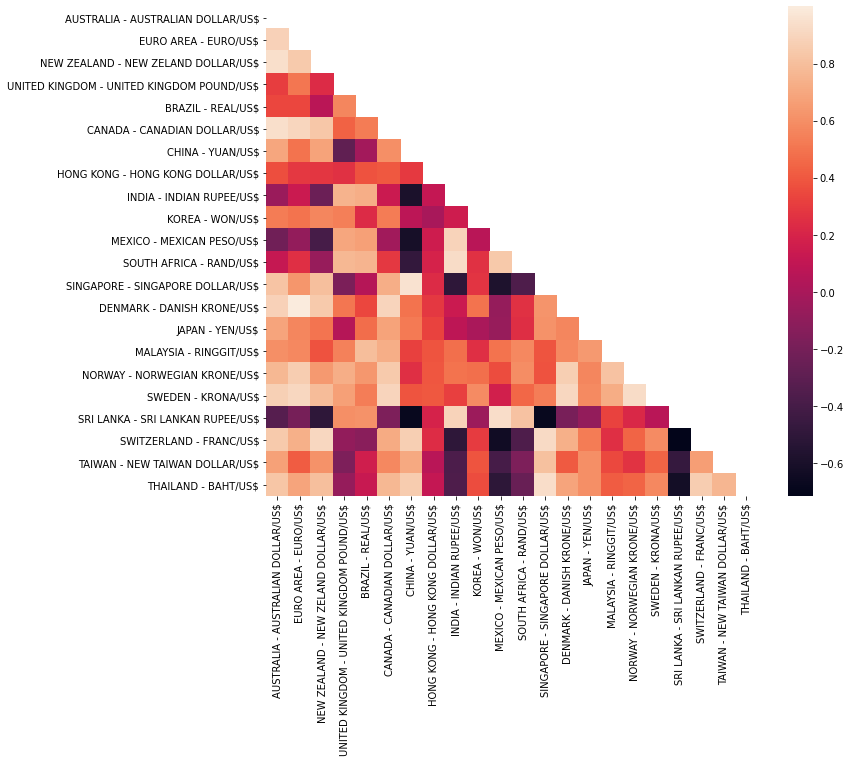

In [102]:

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask)

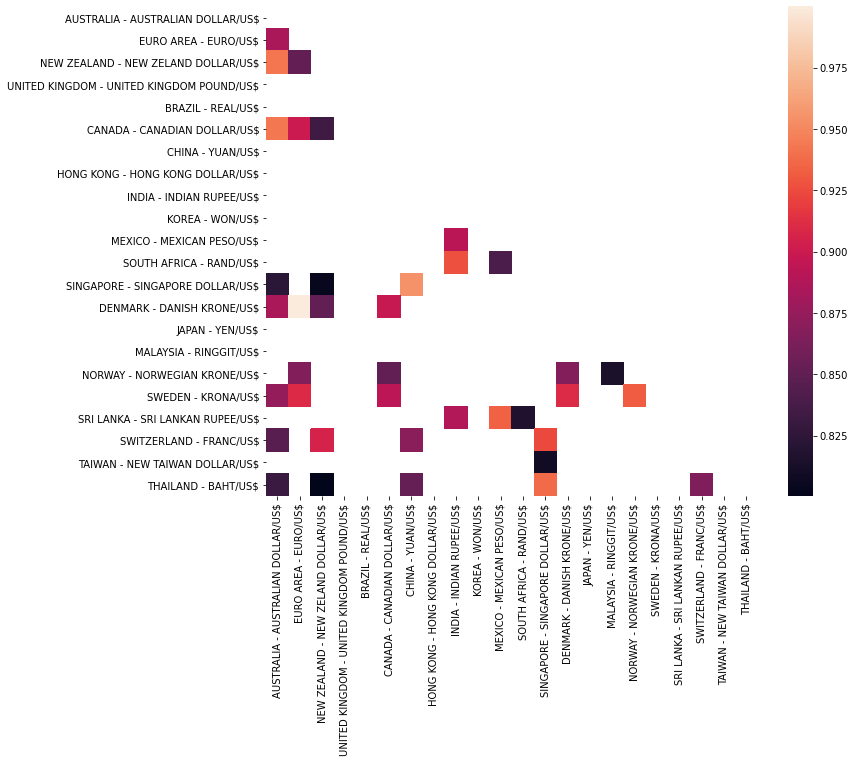

In [103]:
# Compute the correlation matrix
corr = df.corr()[df.corr()>.8]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask)

# **Text Analysis**

In [104]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

def clean_text(text):
    # Split into list
    wordList = text.split()
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    return " ".join(wordList)

In [105]:
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()


def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict

In [106]:
"""
df=pd.read_csv('/content/gdrive/My Drive/Data606/Data/Headlines_Flagged.csv')
df=df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
df=df[df['Date_Flag']==True]"""

"\ndf=pd.read_csv('/content/gdrive/My Drive/Data606/Data/Headlines_Flagged.csv')\ndf=df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)\ndf=df[df['Date_Flag']==True]"

In [107]:
"""import collections

all_pos = " ".join(df['headline_text'])
all_pos=clean_text(all_pos)
word_freq = word_freq_dict(all_pos)
word_freq=collections.OrderedDict(sorted(word_freq.items(), key=lambda t: t[1],reverse=True))
lists = take(50,word_freq.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.plot(x, y)
plt.show()
#plt.pyplot.bar(word_freq.keys,100)"""

'import collections\n\nall_pos = " ".join(df[\'headline_text\'])\nall_pos=clean_text(all_pos)\nword_freq = word_freq_dict(all_pos)\nword_freq=collections.OrderedDict(sorted(word_freq.items(), key=lambda t: t[1],reverse=True))\nlists = take(50,word_freq.items()) # sorted by key, return a list of tuples\nx, y = zip(*lists) # unpack a list of pairs into two tuples\nplt.figure(figsize=(12,8))\nplt.xticks(rotation=90)\nplt.plot(x, y)\nplt.show()\n#plt.pyplot.bar(word_freq.keys,100)'

# **Sentiment Analysis**

In [108]:
path=F'/content/gdrive/My Drive/Data606/Data/Headlines_Sentiment.csv'
df1=pd.read_csv(path)
df1=df1.drop(df1.columns[0], axis=1)
df1['publish_date']=pd.to_datetime(df1['publish_date'])

In [109]:
df1.head(10)

,publish_date,headline_text,sent_neg,sent_nue,sent_pos,sent_comp
0,2003-02-19,aba decides against community broadcasting lic...,0.000,1.000,0.000,0.0000
1,2003-02-19,act fire witnesses must be aware of defamation,0.255,0.745,0.000,-0.3400
2,2003-02-19,a g calls for infrastructure protection summit,0.000,1.000,0.000,0.0000
3,2003-02-19,air nz staff in aust strike for pay rise,0.293,0.707,0.000,-0.2263
4,2003-02-19,air nz strike to affect australian travellers,0.200,0.800,0.000,-0.1280
5,2003-02-19,ambitious olsson wins triple jump,0.000,0.306,0.694,0.7783
6,2003-02-19,antic delighted with record breaking barca,0.000,0.602,0.398,0.5106
7,2003-02-19,aussie qualifier stosur wastes four memphis match,0.000,1.000,0.000,0.0000
8,2003-02-19,aust addresses un security council over iraq,0.000,0.714,0.286,0.3400
9,2003-02-19,australia is locked into war timetable opp,0.394,0.606,0.000,-0.5994


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


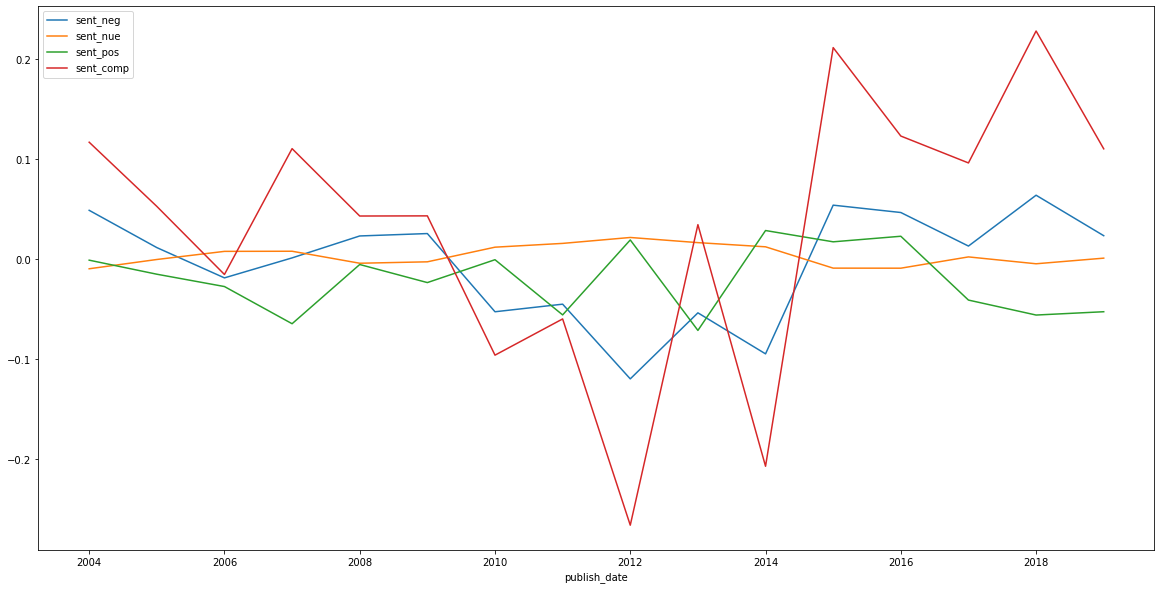

In [110]:
df1.groupby(by=[df1.publish_date.dt.year])['sent_neg','sent_nue','sent_pos','sent_comp'].mean().pct_change(periods=1).plot(figsize=(20,10))

In [111]:
yearly_price=pd.DataFrame(df2.pct_change(1).mean(axis=1)).rename(columns={0:'Change'})
monthly_price=pd.DataFrame(df3.pct_change(1).mean(axis=1)).rename(columns={0:'Change'})

In [112]:
yearly=df1.groupby(by=[df1.publish_date.dt.year])['sent_neg','sent_nue','sent_pos','sent_comp'].mean().pct_change(periods=1).join(yearly_price)
df1['month']=df1.publish_date.dt.month
df1['year']=df1.publish_date.dt.year
monthly=df1.groupby(by=[df1.year,df1.month])['sent_neg','sent_nue','sent_pos','sent_comp'].mean().pct_change(periods=1).join(monthly_price,on=['year','month'],how='inner')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [113]:
monthly

sent_neg  sent_nue  sent_pos  sent_comp    Change
year month                                                   
2003 2           NaN       NaN       NaN        NaN -0.004377
     3      0.087105 -0.022833  0.041091   0.150816  0.006713
     4     -0.144800  0.037574 -0.035141  -0.305928 -0.021648
     5      0.022398 -0.010667  0.054026  -0.032040  0.000000
     6     -0.017245 -0.002272  0.044272  -0.130793 -0.018191
...              ...       ...       ...        ...       ...
2019 8      0.021628  0.000552 -0.046603   0.118651  0.021343
     9     -0.032342  0.005010  0.009161  -0.035295  0.001093
     10     0.051488 -0.007852 -0.012002   0.083510 -0.012003
     11    -0.014914  0.010314 -0.084815   0.067349  0.006232
     12     0.001357 -0.011947  0.144618  -0.098852 -0.015626

[203 rows x 5 columns]

In [114]:
yearly

,sent_neg,sent_nue,sent_pos,sent_comp,Change
publish_date,,,,,
2003,NaN,NaN,NaN,NaN,-0.087463
2004,0.048719,-0.009761,-0.001160,0.116868,-0.055990
2005,0.011426,-0.000483,-0.015209,0.052660,0.051366
2006,-0.018881,0.007645,-0.027550,-0.015479,-0.047666
2007,0.001116,0.007773,-0.064756,0.110437,-0.068955
2008,0.023065,-0.004232,-0.005501,0.043018,0.147197
2009,0.025463,-0.002813,-0.023586,0.043168,-0.073624
2010,-0.052779,0.011836,-0.000701,-0.096200,-0.037982
2011,-0.045191,0.015625,-0.055928,-0.059957,0.032886


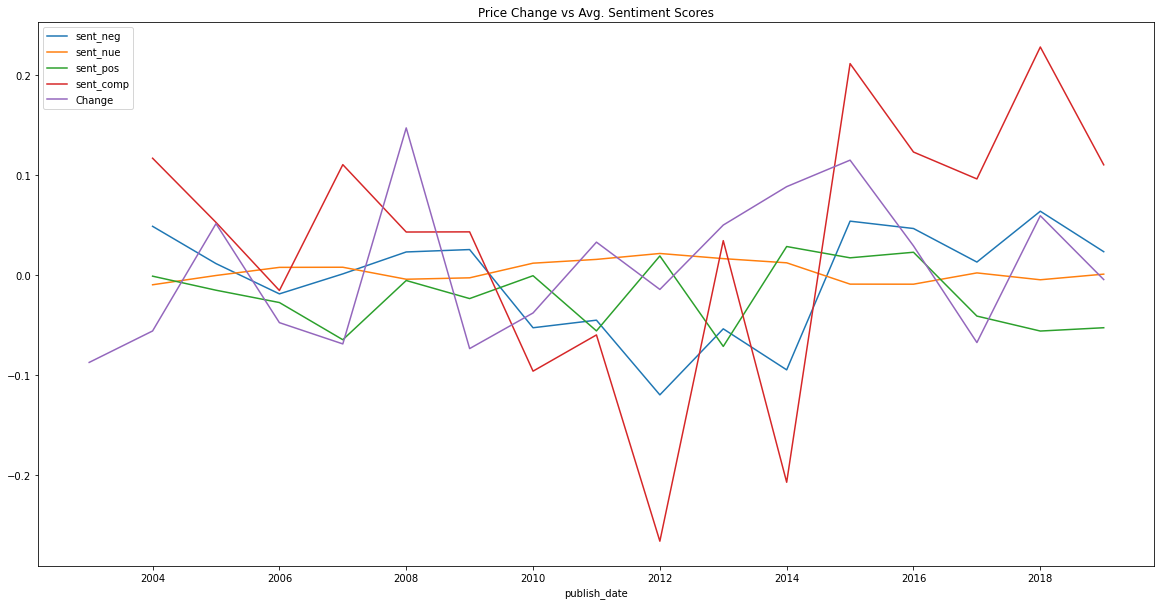

In [115]:
yearly.plot(title='Price Change vs Avg. Sentiment Scores',figsize=(20,10))

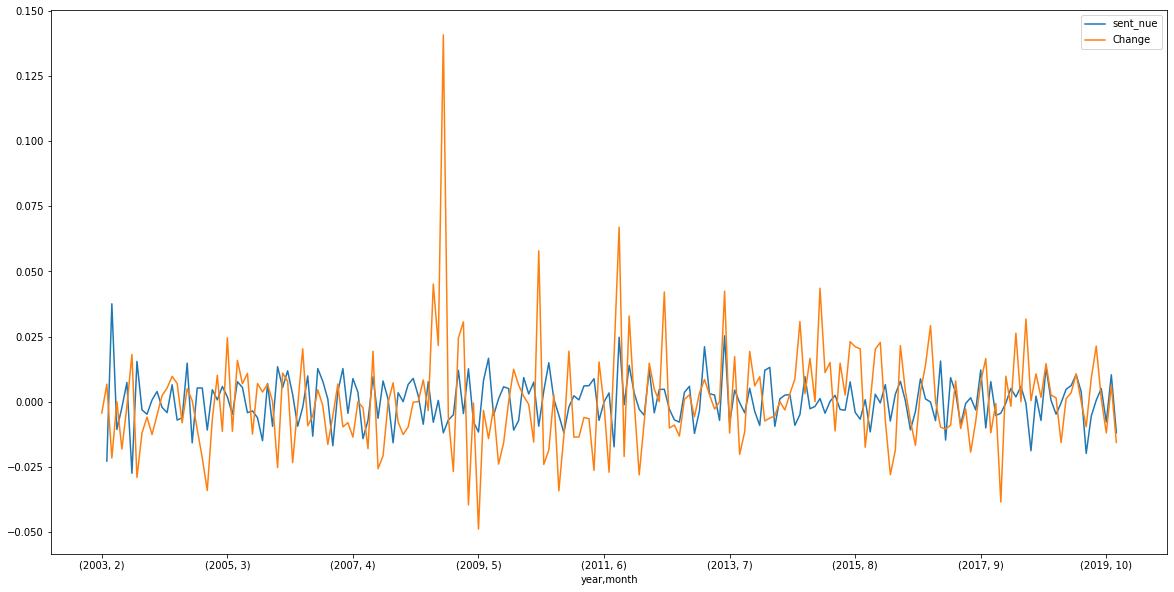

In [116]:
monthly[['sent_nue','Change']].plot(figsize=(20,10))

#**Sentiment Regression Modeling**

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
import random

In [118]:
train=monthly[(monthly.index.get_level_values('year') <= 2015) & (monthly.index.get_level_values('year') > 2003)]
test=monthly[monthly.index.get_level_values('year') > 2015]

In [119]:
train

sent_neg  sent_nue  sent_pos  sent_comp    Change
year month                                                   
2004 1     -0.008092  0.003888 -0.016788   0.033259 -0.005090
     2      0.002108 -0.002203  0.013923  -0.080011  0.002352
     3      0.028967 -0.004216 -0.014755   0.191301  0.005205
     4     -0.021250  0.006487 -0.014598  -0.072818  0.009698
     5      0.041207 -0.007075 -0.013370   0.148092  0.007019
...              ...       ...       ...        ...       ...
2015 8     -0.013395 -0.004102  0.064753  -0.141117  0.021088
     9      0.047163 -0.006743 -0.000226   0.144373  0.020291
     10    -0.019265  0.000728  0.021733  -0.079866 -0.017515
     11     0.108986 -0.011630 -0.044186   0.415400  0.000000
     12    -0.053536  0.002843  0.061191  -0.222536  0.020125

[144 rows x 5 columns]

In [120]:
reg = LinearRegression().fit(train.drop('Change',axis=1), train['Change'])
pred_lin=reg.predict(test.drop('Change',axis=1))
reg.score(test.drop('Change',axis=1),test['Change'])

0.07554068727177354

In [121]:
mean_squared_error(test['Change'],pred_lin)

0.00019249066081048578

In [122]:
#compare regression to random walk
rand_walk=[random.uniform(-.025,.025) for x in range(0,len(test))]
mean_squared_error(test['Change'],rand_walk)

0.00038678253237920735

In [123]:
test['lin_reg']=pred_lin
test['random']=rand_walk

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


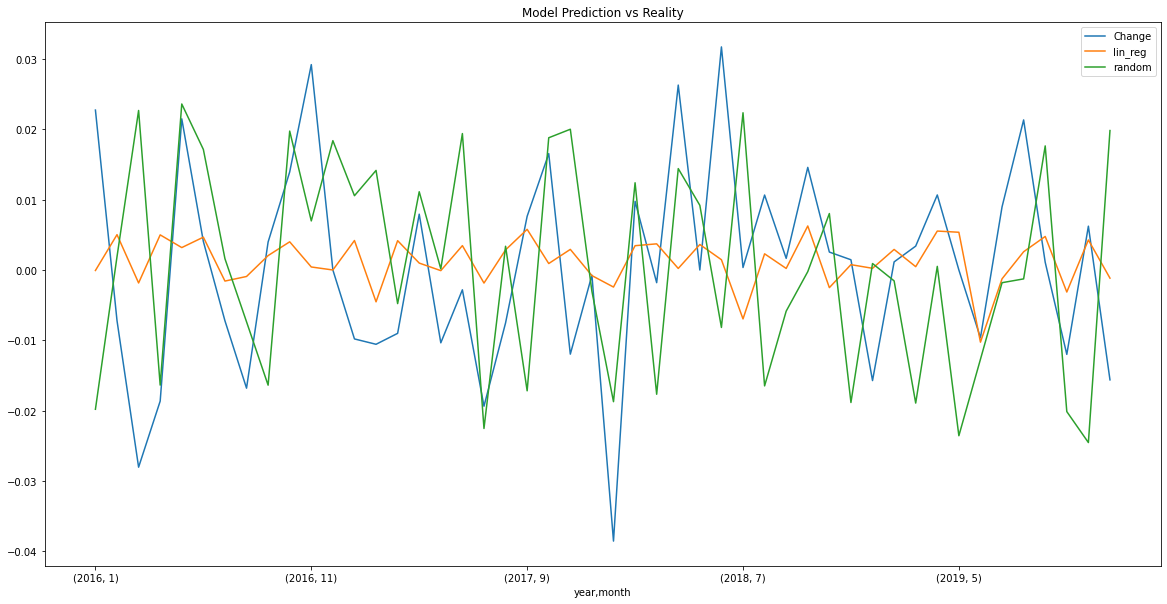

In [124]:
test[['Change','lin_reg','random']].plot(title='Model Prediction vs Reality',figsize=(20,10))

Sentiment Counter Trading

In [125]:
def isPeak(arr, n, num, i, j):

    # If num is smaller than the element
    # on the left (if exists)
    if (i >= 0 and arr[i] > num):
        return False

    # If num is smaller than the element
    # on the right (if exists)
    if (j < n and arr[j] > num):
        return False
    return True

# Function that returns true if num is
# smaller than both arr[i] and arr[j]
def isTrough(arr, n, num, i, j):

    # If num is greater than the element
    # on the left (if exists)
    if (i >= 0 and arr[i] < num):
        return False

    # If num is greater than the element
    # on the right (if exists)
    if (j < n and arr[j] < num):
        return False
    return True


def peak_trough(data):
    arr=data['lin_reg'].values
    n = len(arr)
    peak_ind = []
    valley_ind = []

    for i in range(n):
        # If the current element is a peak
        if (isPeak(arr, n, arr[i], i - 1, i + 1)):
            # print(arr[i], end = " ")
            peak_ind.append(True)
        else:
            peak_ind.append(False)

    for i in range(n):
        # If the current element is a trough
        if (isTrough(arr, n, arr[i], i - 1, i + 1)):
            # print(arr[i], end = " ")
            valley_ind.append(True)
        else:
            valley_ind.append(False)
    return peak_ind,valley_ind


def f(row):
    if row['Peak'] == True:
        val = 'Sell'
    elif row['Trough'] == True:
        val = 'Buy'
    else:
        val = 'Hold'
    return val



In [126]:
peak,valley=peak_trough(test)

In [127]:
test['Peak']=peak
test['Trough']=valley

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
test['Decision'] = test.apply(f, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
money=df3.join(test['Decision'],on=['year','month'],how='right')

In [130]:
money

AUSTRALIA - AUSTRALIAN DOLLAR/US$  ...  Decision
year month                                     ...          
2016 1                                 1.4276  ...       Buy
     2                                 1.4025  ...      Sell
     3                                 1.3247  ...       Buy
     4                                 1.2918  ...      Sell
     5                                 1.3837  ...       Buy
     6                                 1.3592  ...      Sell
     7                                 1.3305  ...       Buy
     8                                 1.3134  ...      Hold
     9                                 1.3086  ...      Hold
     10                                1.3060  ...      Sell
     11                                1.3373  ...      Hold
     12                                   NaN  ...       Buy
2017 1                                 1.3278  ...      Sell
     2                                 1.2999  ...       Buy
     3                                 1.3118  ...      Sell
     4                                 1.3401  ...      Hold
     5                                 1.3441  ...       Buy
     6                                 1.3175  ...      Sell
     7                                 1.2623  ...       Buy
     8                                 1.2569  ...      Hold
     9                                 1.2690  ...      Sell
     10                                1.3007  ...       Buy
     11                                1.3149  ...      Sell
     12                                1.2940  ...      Hold
2018 1                                 1.2338  ...       Buy
     2                                 1.2750  ...      Hold
     3                                 1.2942  ...      Sell
     4                                 1.3228  ...       Buy
     5                                    NaN  ...      Sell
     6                                 1.3510  ...      Hold
     7                                 1.3543  ...       Buy
     8                                 1.3613  ...      Sell
     9                                 1.3774  ...       Buy
     10                                1.4108  ...      Sell
     11                                1.3831  ...       Buy
     12                                1.4144  ...      Sell
2019 1                                 1.3955  ...       Buy
     2                                 1.3924  ...      Sell
     3                                 1.4006  ...       Buy
     4                                 1.4196  ...      Sell
     5                                    NaN  ...      Hold
     6                                 1.4306  ...       Buy
     7                                 1.4476  ...      Hold
     8                                 1.4745  ...      Hold
     9                                 1.4806  ...      Sell
     10                                1.4622  ...       Buy
     11                                1.4734  ...      Sell
     12                                1.4411  ...       Buy

[48 rows x 23 columns]

In [131]:
from __future__ import division # floating point division in Py2x
import math

def divide_list_sum(a,b):
  ret=sum([x/y for x, y in zip(a, b)])
  return ret

def Calc_Return(df):
  Row_list=[]
  for index, rows in df.iterrows(): 
    # Create list for the current row 
    my_list = [rows[l] for l in range(0,22)]  
    #my_list =[rows[0],rows[1],rows[2]] #rows[5],rows[12],rows[13],rows[17],rows[19],rows[21]]
    # append the list to the final list 
    Row_list.append(my_list) 
  print(Row_list)

  #assumption $1 per currency purchased per month
  y=len(df)-1
  ret=[]
  
  for x in range(y):
    if df.Decision[x]=='Buy':
      i=x+1
      while df.Decision[i]=='Buy':
        i+=1
      val=divide_list_sum(Row_list[x],Row_list[i])
      if math.isnan(val):
        ret.append(0)
      else:
        ret.append(val)
    
    elif df.Decision[x]=='Sell':
      i=x+1
      while df.Decision[i]=='Sell':
        i+=1
      val=divide_list_sum(Row_list[i],Row_list[x])
      if math.isnan(val):
        ret.append(0)
      else:
        ret.append(val)

  return sum(ret),ret

      
      
    
      


In [132]:
x,y=Calc_Return(money)

[[1.4276, 0.922, 1.5404, 0.6973, 4.0701, 1.4062, 6.5814, 7.7932, 67.75, 1199.64, 18.475, 16.3535, 1.4259, 6.8799, 118.5, 4.2885, 8.6972, 8.5614, 143.24, 1.0189, 33.46, 35.83], [1.4025, 0.9147, 1.5042, 0.7211, 4.012, 1.3546, 6.539, 7.7724, 68.82, 1242.59, 18.185, 16.155, 1.4075, 6.8234, 113.78, 4.207, 8.6826, 8.5557, 143.9, 0.9967, 33.29, 35.73], [1.3247, 0.8921, 1.4861, 0.7018, 3.639, 1.3184, 6.5051, 7.7576, 66.58, 1163.39, 17.4535, 15.5755, 1.3697, 6.6515, 113.29, 4.011, 8.4195, 8.2808, 147.2, 0.9732, 32.56, 35.34], [1.2918, 0.8835, 1.4503, 0.6844, 3.5269, 1.2614, 6.4905, 7.7553, 66.4, 1146.66, 17.386, 14.3605, 1.3516, 6.5747, 111.23, 3.92, 8.136000000000001, 8.0938, 145.38, 0.9713, 32.27, 35.12], [1.3837, 0.8941, 1.4809999999999999, 0.6815, 3.5775, 1.298, 6.553999999999999, 7.765, 66.9, 1178.09, 18.45, 15.565, 1.3736, 6.6499, 109.74, 4.078, 8.2705, 8.2847, 146.03, 0.9898, 32.49, 35.59], [1.3592, 0.9071, 1.4245, 0.7566, 3.4025, 1.3076, 6.6481, 7.7605, 67.92, 1181.24, 19.152, 15.49, 1.

In [133]:
total=0
total_list=[]
for l in y:
  if l==0:
    total+=0
    total_list.append(total/22)
  else:
    total+=(l-22)
    total_list.append(total/22)
    #print(total)




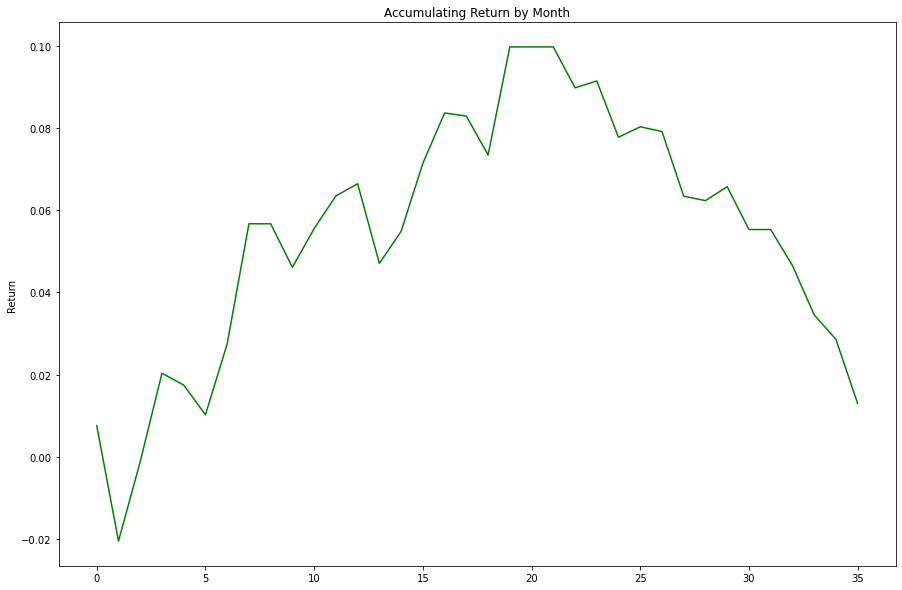

In [134]:
plt.figure(figsize=(15,10))
plt.plot(total_list,color='green')
plt.title('Accumulating Return by Month')
plt.ylabel('Months')
plt.ylabel('Return')
plt.show()

# **Sentiment Classification Modeling**

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [136]:
train=monthly[(monthly.index.get_level_values('year') <= 2015) & (monthly.index.get_level_values('year') > 2003)]
test=monthly[monthly.index.get_level_values('year') > 2015]
train['Y']=[-1 if x<0 else 1  if x>0 else 0 for x in train['Change'].values]
test['Y']=[-1 if x<0 else 1  if x>0 else 0 for x in test['Change'].values]
train=train.drop('Change',axis=1)
test=test.drop('Change',axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [137]:
clf = LogisticRegression(random_state=0).fit(train.drop('Y',axis=1),train['Y'])
pred =clf.predict(test.drop('Y',axis=1))
accuracy_score(test['Y'],pred)

0.4166666666666667